In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Main
1. average sentence length of section
2. [Type-Token Ratio (TTR)](https://medium.com/@rajeswaridepala/empirical-laws-ttr-cc9f826d304d) of each section


In [ ]:
import spacy
# Load the 'en_core_web_sm' model
nlp = spacy.load('en_core_web_sm')

In [ ]:
# Define the pathnames for file access
directory = '/content/drive/MyDrive/b2 research/B2_'
filenames = ['intro.txt',
             'methods.txt',
             'results.txt',
             'discus.txt',
             'conclu.txt']

In [87]:
# for each file
ttrchart = []
senlenchart = []
wc = []
for fn in filenames:
  print(f'= = = Calculations for {fn} = = =')

  # retrieve sentences
  f =  open(directory+fn, "r")
  contents = f.read()

  sents = contents.split('. ')

  taggedsents = [] # all sents of the section
  wordcounts = [] # list of wordcount/sent
  types = []

  for sent in sents:
    doc = nlp(sent+'.')
    taggedsent = []

    for token in doc:
      taggedword = (token.text, token.pos_)
      taggedsent.append(taggedword)

    # types = []
    tokens = []
    for (word, tag) in taggedsent:
      if tag not in ['PUNCT', 'SPACE', 'NUM', 'SYM','X']:
        tokens.append(word)
        if word not in types:
          types.append(word)

      # alltypes.append(types)

    wordcounts.append(len(tokens))
    taggedsents.append(taggedsent)

  # count average sentence length
  print(sum(wordcounts), len(taggedsents))
  avgSentLen = sum(wordcounts)/len(taggedsents)
  senlenchart.append(avgSentLen)
  print(f"Average sentence length: {avgSentLen}")
  wc.append(sum(wordcounts))

  # count TTR
  ttr = len(types)/len(wordcounts)
  ttrchart.append(ttr)
  print(f"TTR: {ttr}")

  print("\n")

= = = Calculations for intro.txt = = =
589 21
Average sentence length: 28.047619047619047
TTR: 13.952380952380953


= = = Calculations for methods.txt = = =
293 11
Average sentence length: 26.636363636363637
TTR: 16.0


= = = Calculations for results.txt = = =
275 9
Average sentence length: 30.555555555555557
TTR: 13.222222222222221


= = = Calculations for discus.txt = = =
601 19
Average sentence length: 31.63157894736842
TTR: 13.736842105263158


= = = Calculations for conclu.txt = = =
193 5
Average sentence length: 38.6
TTR: 22.4




## 3. POS distribution of each section

spacy: https://spacy.io/usage/linguistic-features#pos-tagging

universal POS tags: https://universaldependencies.org/u/pos/


In [ ]:
nouns = ['NOUN', 'PRON', 'PROPN']
verbs = ['VERB']
adjectives = ['ADJ']
adverbs = ['ADV']
# determiners = ['DET']
others = ['PUNCT', 'SPACE', 'SYM', 'X']
numeral = ['NUM']

In [ ]:
def docTagger(filename):
  f =  open(filename, "r")
  contents = f.read()
  sents = contents.split('. ')

  taggedSents = []

  for sent in sents:
    doc = nlp(sent+'.')
    taggedsent = []

    for token in doc:
      taggedword = (token.text, token.pos_)
      taggedSents.append(taggedword)

  return taggedSents

In [81]:
# Functions to return count/percentage results into a list
def getCounts(counter, total_count):
    counts = []
    for tag, count in counter.items():
        counts.append((tag, count))  # Store as a tuple of (tag, count)

    # Sort the list of tuples by the tag (first element)
    counts = sorted(counts, key=lambda x: x[0])
    return counts


In [82]:
# Function to print a properly aligned tab-separated table
def printResults(counter, total_count):
    # Printing the header with fixed-width formatting for better alignment
    print(f"{'Tag':<10}{'Frequency':<12}{'Percentage':<10}")

    # Iterate through the counter and print the rows with fixed-width formatting
    for tag, count in counter.items():
        percentage = (count / total_count) * 100
        print(f"{tag:<10}{count:<12}{percentage:>9.2f}%")

In [83]:
import collections
freqlists = []

In [84]:
# for each file
for filename in filenames:
  fn = directory+filename
  print(f'= = = Results for {filename} = = =')
  sentences = docTagger(fn)
  tags = [tag for (word, tag) in sentences]

  generalTags = []
  for tag in tags:
    if tag in nouns:
      generalTags.append('NN')
    elif tag in verbs:
      generalTags.append('VB')
    elif tag in adjectives:
      generalTags.append('AJ')
    elif tag in adverbs:
      generalTags.append('AV')
    elif tag in others:
      generalTags.append('OT') #others
    elif tag in numeral:
      generalTags.append('NUM')
    else:
      generalTags.append('CC') # close class

  tagcount = collections.Counter(tags)
  gtagcount = collections.Counter(generalTags)


  # Print the results for both original tags and generalized tags
  print("Original Tag Counts and Percentages:")
  printResults(tagcount, len(tags))

  print("\nGeneralized Tag Counts and Percentages:")
  printResults(gtagcount, len(generalTags))

  print('\n')

  freqlists.append(getCounts(gtagcount, len(generalTags)))

= = = Results for intro.txt = = =
Original Tag Counts and Percentages:
Tag       Frequency   Percentage
ADV       17               2.35%
PRON      10               1.39%
VERB      64               8.86%
DET       58               8.03%
NOUN      172             23.82%
ADP       96              13.30%
PART      13               1.80%
ADJ       57               7.89%
CCONJ     21               2.91%
X         18               2.49%
NUM       32               4.43%
PUNCT     78              10.80%
AUX       20               2.77%
PROPN     52               7.20%
SCONJ     9                1.25%
SPACE     3                0.42%
SYM       2                0.28%

Generalized Tag Counts and Percentages:
Tag       Frequency   Percentage
AV        17               2.35%
NN        234             32.41%
VB        64               8.86%
CC        217             30.06%
AJ        57               7.89%
OT        101             13.99%
NUM       32               4.43%


= = = Results for methods.tx

In [85]:
freqlists

[[('AJ', 57),
  ('AV', 17),
  ('CC', 217),
  ('NN', 234),
  ('NUM', 32),
  ('OT', 101),
  ('VB', 64)],
 [('AJ', 22),
  ('AV', 1),
  ('CC', 114),
  ('NN', 124),
  ('NUM', 5),
  ('OT', 42),
  ('VB', 32)],
 [('AJ', 18),
  ('AV', 8),
  ('CC', 100),
  ('NN', 118),
  ('NUM', 43),
  ('OT', 66),
  ('VB', 31)],
 [('AJ', 55),
  ('AV', 18),
  ('CC', 236),
  ('NN', 217),
  ('NUM', 29),
  ('OT', 83),
  ('VB', 75)],
 [('AJ', 23), ('CC', 74), ('NN', 71), ('NUM', 3), ('OT', 17), ('VB', 25)]]

# plot graphs

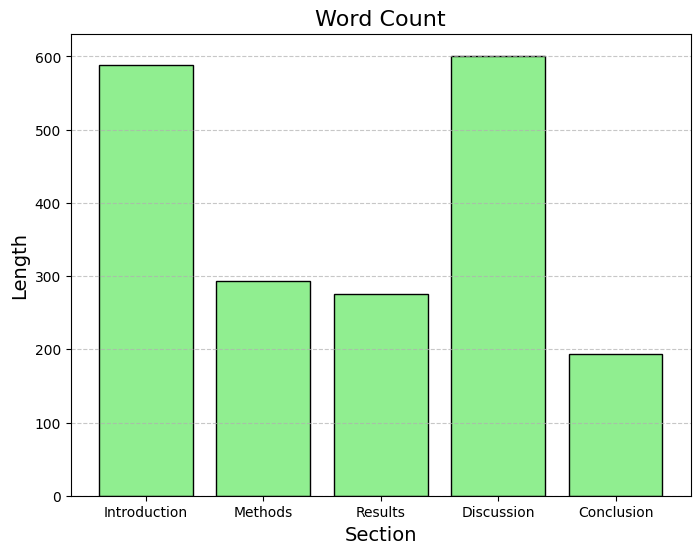

In [88]:
import matplotlib.pyplot as plt

# Data for the bar chart
categories = ['Introduction', 'Methods', 'Results', 'Discussion', 'Conclusion']
values = wc  # Values corresponding to each category

# Create the bar chart
plt.figure(figsize=(8, 6))  # Optional: Adjust figure size
plt.bar(categories, values, color='lightgreen', edgecolor='black')

# Add labels and title
plt.xlabel('Section', fontsize=14)
plt.ylabel('Length', fontsize=14)
plt.title('Word Count', fontsize=16)

# Add grid lines (optional)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the chart
plt.show()

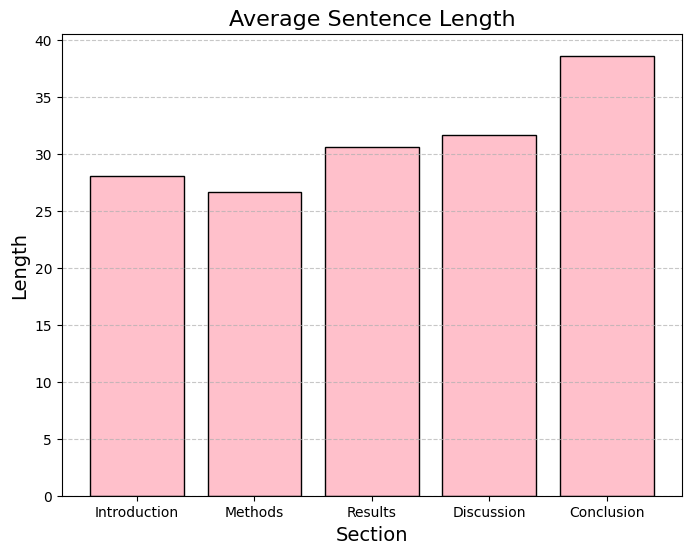

In [89]:
import matplotlib.pyplot as plt

# Data for the bar chart
categories = ['Introduction', 'Methods', 'Results', 'Discussion', 'Conclusion']
values = senlenchart  # Values corresponding to each category

# Create the bar chart
plt.figure(figsize=(8, 6))  # Optional: Adjust figure size
plt.bar(categories, values, color='pink', edgecolor='black')

# Add labels and title
plt.xlabel('Section', fontsize=14)
plt.ylabel('Length', fontsize=14)
plt.title('Average Sentence Length', fontsize=16)

# Add grid lines (optional)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the chart
plt.show()

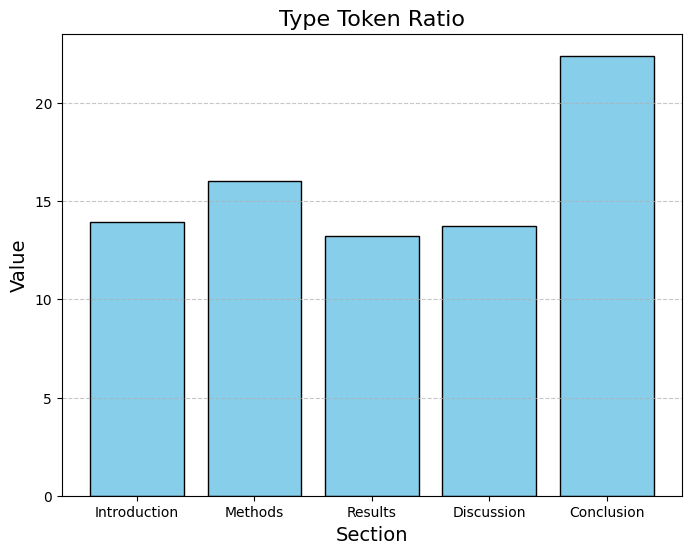

In [90]:
import matplotlib.pyplot as plt

# Data for the bar chart
categories = ['Introduction', 'Methods', 'Results', 'Discussion', 'Conclusion']
values = ttrchart  # Values corresponding to each category

# Create the bar chart
plt.figure(figsize=(8, 6))  # Optional: Adjust figure size
plt.bar(categories, values, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Section', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Type Token Ratio', fontsize=16)

# Add grid lines (optional)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the chart
plt.show()

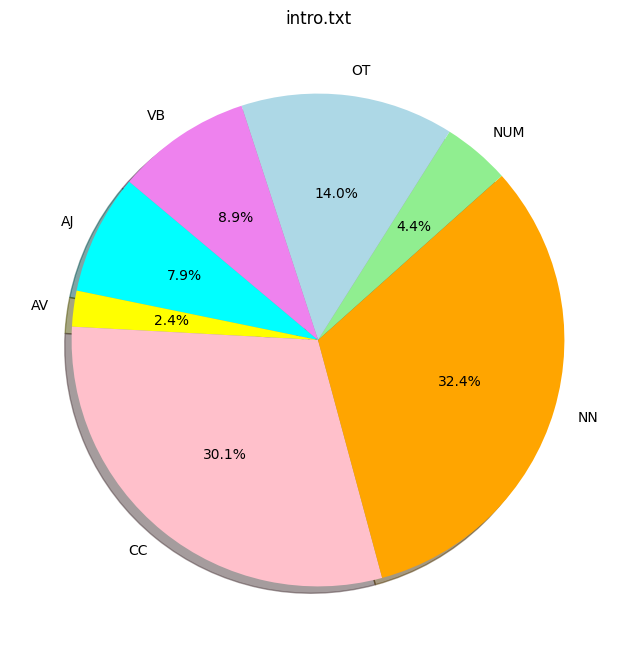

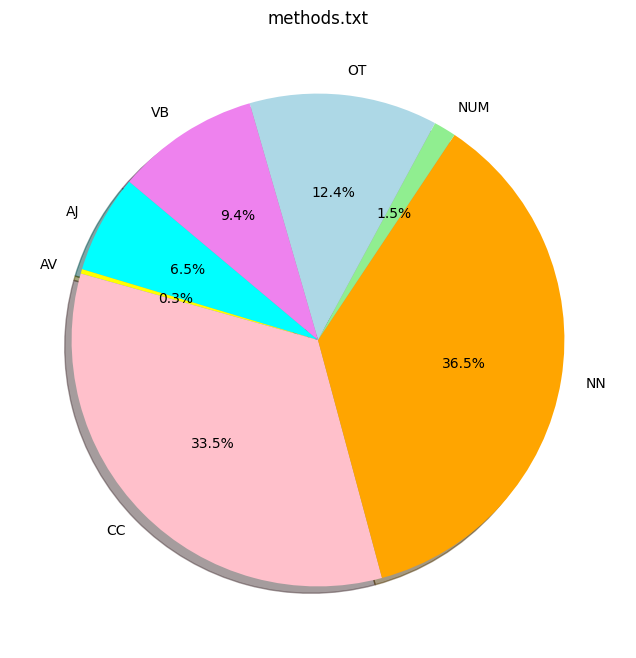

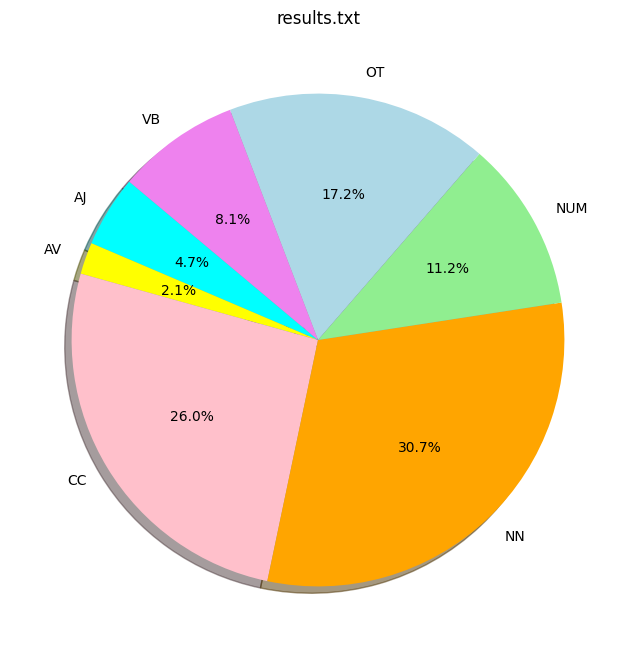

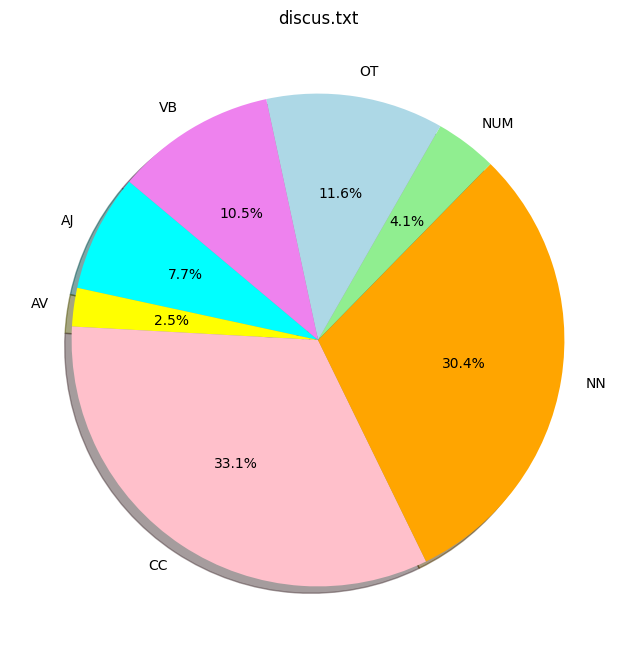

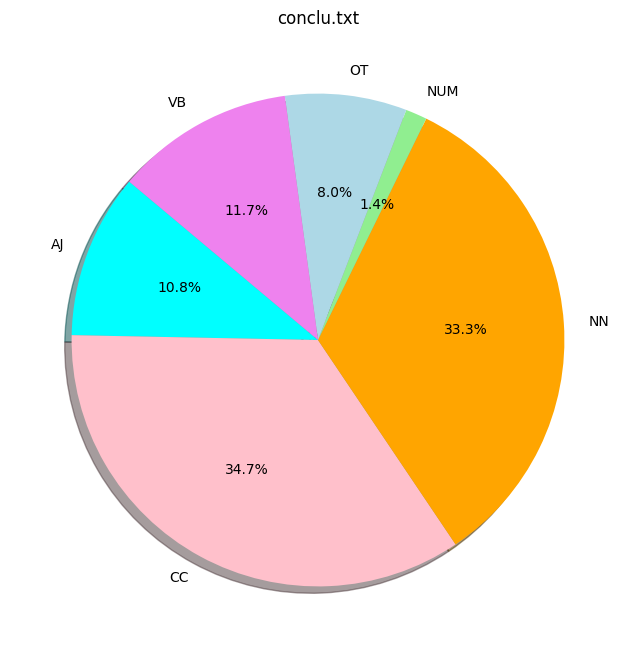

In [91]:
import matplotlib.pyplot as plt

# Define a color mapping for the tags
color_mapping = {
    'AJ': 'cyan',
    'AV': 'yellow',
    'CC': 'pink',
    'NN': 'orange',
    'NUM': 'lightgreen',
    'OT': 'lightblue',
    'VB': 'violet'
}

# Ensure that the loop iterates only over the available filenames
# the original for loop was:
# for (i, flist) in enumerate(freqlists):
#   ...
#   plt.title(filenames[i])
#   ...
# This caused an index error because freqlists has 10 items but filenames only has 5
# changed the loop to only iterate over the length of filenames
for i in range(len(filenames)):
    flist = freqlists[i]
    # Data for the pie chart
    labels = [tag for (tag,freq) in flist]
    sizes = [freq for (tag,freq) in flist]  # Percentages or raw values
    colors = [color_mapping.get(tag, 'gray') for tag in labels]  # Default to 'gray' if tag not in color_mapping

    # Create the pie chart
    plt.figure(figsize=(8, 8))  # Optional: Adjust figure size
    plt.pie(sizes, labels=labels, colors=colors,# explode=explode,
            autopct='%1.1f%%', shadow=True, startangle=140)

    # Title for the chart
    plt.title(filenames[i])  # Now i is within the valid range for filenames

    # Display the chart
    plt.show()

In [92]:
# Original data structure
freqlists = [
    [('AJ', 57), ('AV', 17), ('CC', 217), ('NN', 234), ('NUM', 32), ('OT', 101), ('VB', 64)],
    [('AJ', 22), ('AV', 1), ('CC', 114), ('NN', 124), ('NUM', 5), ('OT', 42), ('VB', 32)],
    [('AJ', 18), ('AV', 8), ('CC', 100), ('NN', 118), ('NUM', 43), ('OT', 66), ('VB', 31)],
    [('AJ', 55), ('AV', 18), ('CC', 236), ('NN', 217), ('NUM', 29), ('OT', 83), ('VB', 75)],
    [('AJ', 23), ('AV', 0),('CC', 74), ('NN', 71), ('NUM', 3), ('OT', 17), ('VB', 25)]
]

# Initialize a dictionary to store the frequencies for each tag
tag_frequencies = {tag: [] for tag, _ in freqlists[0]}  # Use the tags from the first list as keys

# Iterate over the freqlists and populate the tag_frequencies dictionary
for flist in freqlists:
    for tag, freq in flist:
        tag_frequencies[tag].append(freq)

# Convert the dictionary into a list of lists of frequencies
refreqs = list(tag_frequencies.values())

# Print the result
for i, freq_list in enumerate(refreqs):
    print(f"Tag {list(tag_frequencies.keys())[i]} frequencies: {freq_list}")

Tag AJ frequencies: [57, 22, 18, 55, 23]
Tag AV frequencies: [17, 1, 8, 18, 0]
Tag CC frequencies: [217, 114, 100, 236, 74]
Tag NN frequencies: [234, 124, 118, 217, 71]
Tag NUM frequencies: [32, 5, 43, 29, 3]
Tag OT frequencies: [101, 42, 66, 83, 17]
Tag VB frequencies: [64, 32, 31, 75, 25]


In [93]:
refreqs

[[57, 22, 18, 55, 23],
 [17, 1, 8, 18, 0],
 [217, 114, 100, 236, 74],
 [234, 124, 118, 217, 71],
 [32, 5, 43, 29, 3],
 [101, 42, 66, 83, 17],
 [64, 32, 31, 75, 25]]

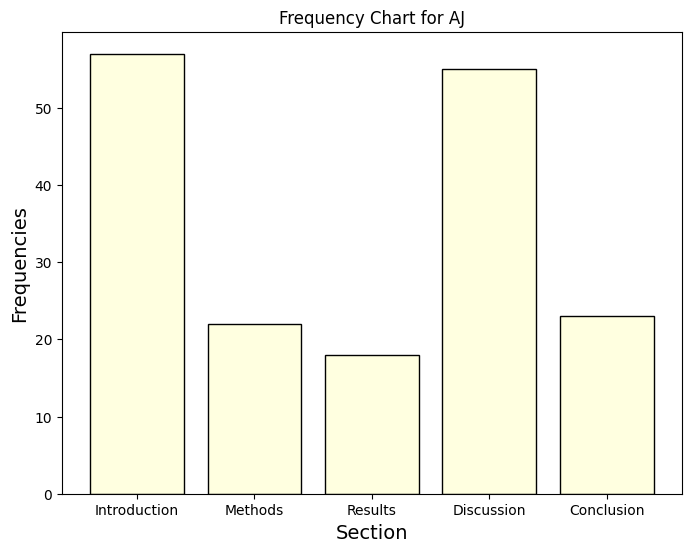

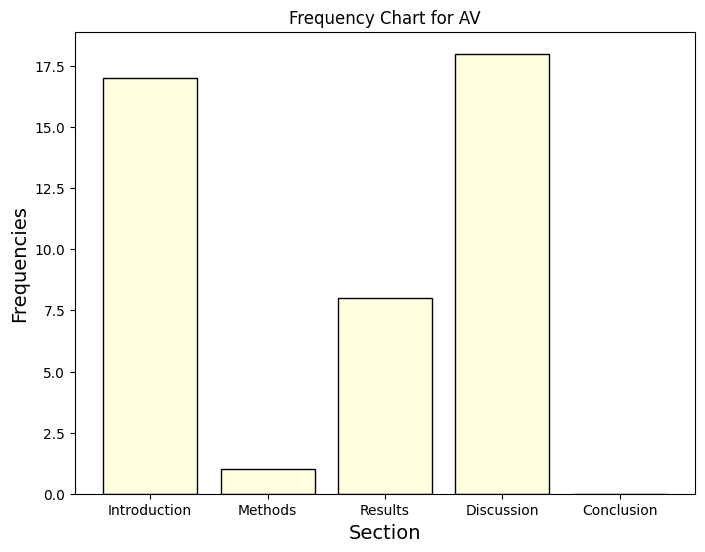

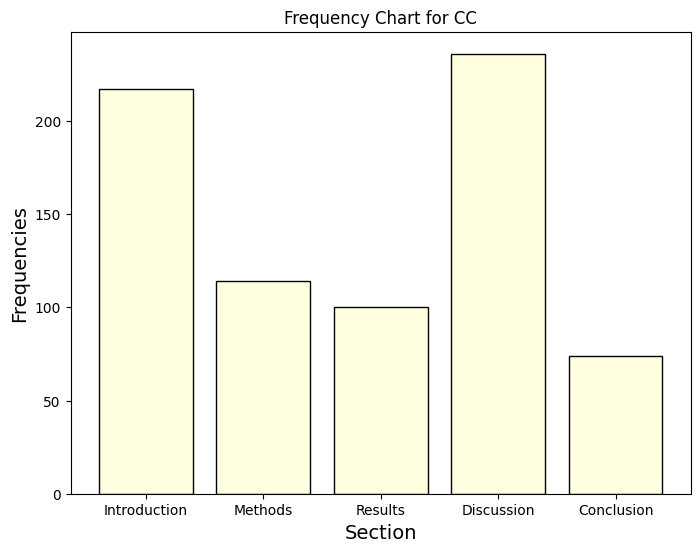

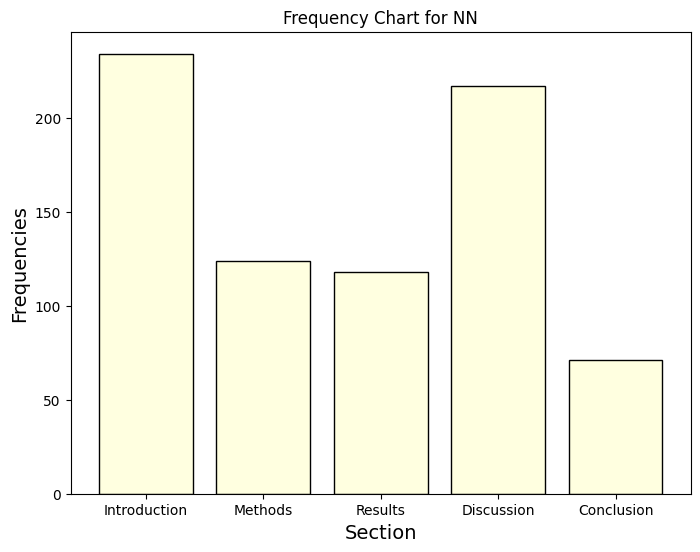

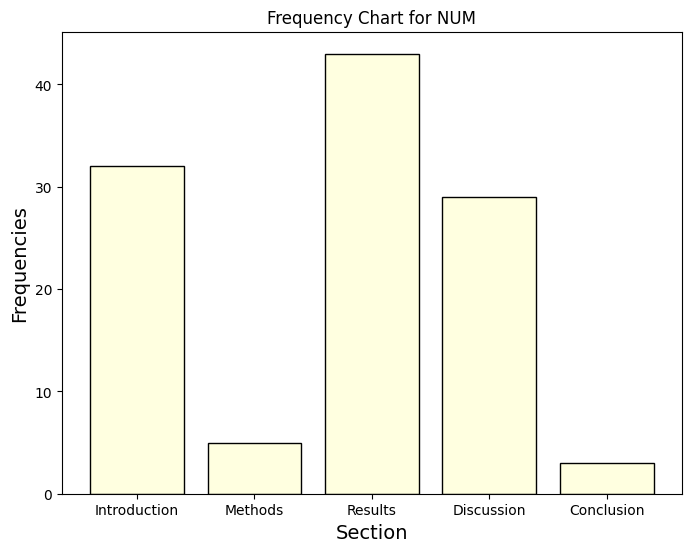

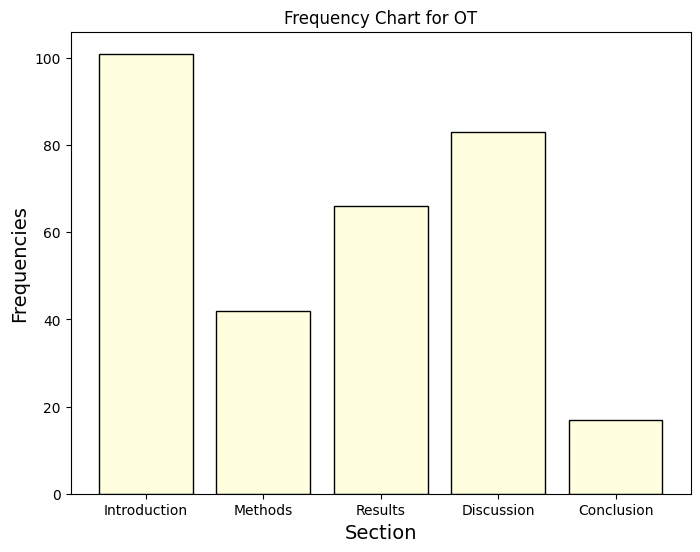

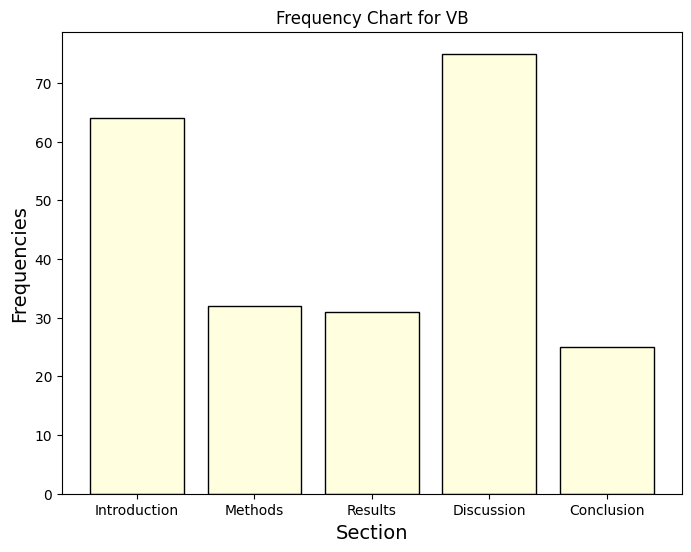

In [94]:
for (i, flist) in enumerate(refreqs):
    # Data for the bar chart
    labels = ['Introduction', 'Methods', 'Results', 'Discussion', 'Conclusion']
    sizes = [freq for freq in flist]

    # Create a bar chart for the current frequency list
    plt.figure(figsize=(8, 6))  # Optional: Adjust figure size
    plt.bar(labels, sizes, color='lightyellow', edgecolor='black')

    # Add labels and title
    plt.xlabel('Section', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

    # Title for the chart
    tags = ['AJ', 'AV', 'CC', 'NN','NUM', 'OT','VB']
    plt.title(f'Frequency Chart for {tags[i]}')

    # Label the axes
    # plt.xlabel('Tags')
    plt.ylabel('Frequencies')

    # Display the chart
    plt.show()